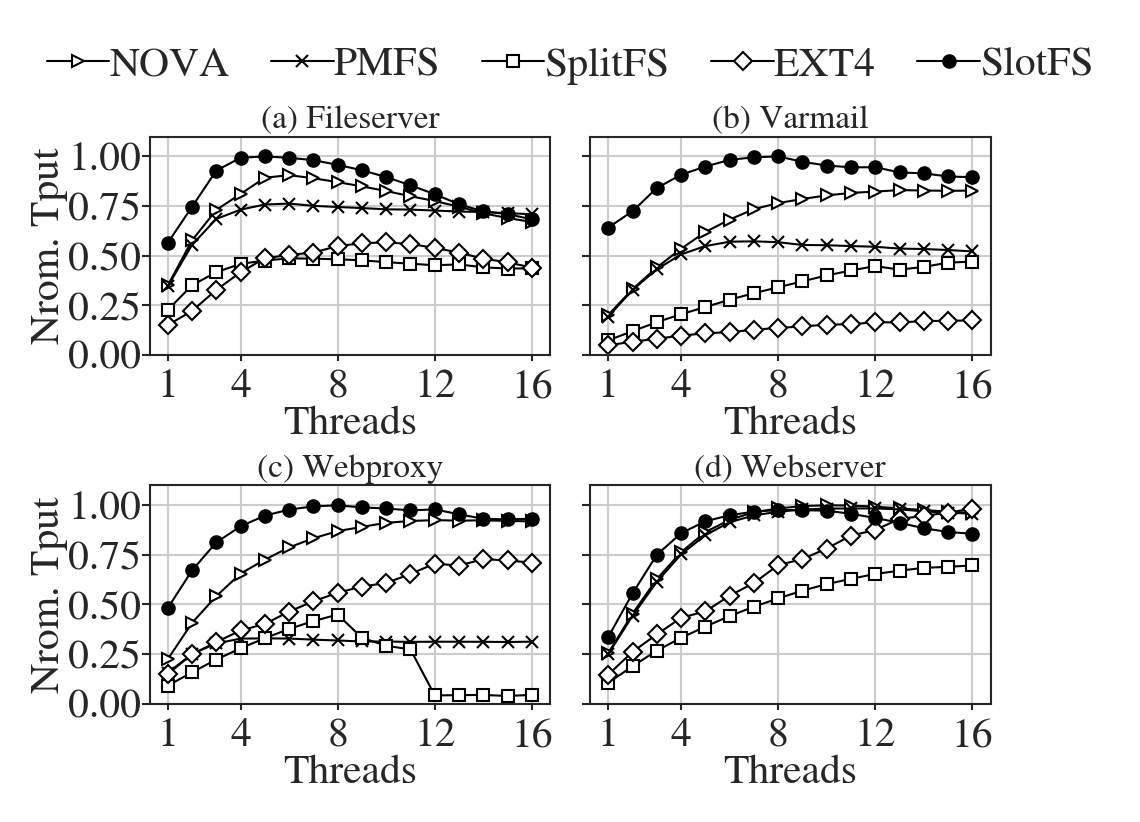

In [ ]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-v0_8-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["font.size"] = 8
pd.options.display.max_columns = None
pd.options.display.max_rows = None

with open("./performance-table", "r") as f:
    df = pd.read_csv(f, index_col=None, engine='python', sep=' ')
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(6)))

colors = ['white', 'white', 'white', 'white', 'black']
marks = [">", "x", "s", "D", "o"]
fbs = ["fileserver.f", "varmail.f", "webproxy.f", "webserver.f"]
titles = ["(a) Fileserver", "(b) Varmail", "(c) Webproxy", "(d) Webserver"]
fss = ["NOVA", "PMFS", "SplitFS-FILEBENCH", "EXT4-DAX", "SLOTFS"]
num_jobs = range(1, 17)  
x = list(num_jobs) 

mapping = {
    "NOVA": "NOVA",
    "PMFS": "PMFS",
    "SLOTFS": "SlotFS",
    "SplitFS-FILEBENCH": "SplitFS",
    "EXT4-DAX": "EXT4"
}
mapped_fss = [mapping.get(item, item) for item in fss]

max_iops_per_bench = df.groupby('file_bench')['iops'].max().to_dict()
df['normalized_iops'] = df.apply(lambda row: row['iops'] / max_iops_per_bench[row['file_bench']], axis=1)

lines = []
for i in range(4):
    plt.subplot(2, 2, i + 1)
    fb = fbs[i]
    for idx, fs in enumerate(fss):
        y = df[(df['file_system'] == fs) & (df['file_bench'] == fb)]['normalized_iops'].iloc[:len(num_jobs)]
        p, = plt.plot(x, y, color="black", markerfacecolor=colors[idx], linewidth=0.5,label=fs, marker=marks[idx], markeredgecolor="black", markersize=3, markeredgewidth=0.5)
        plt.scatter(x, y, color=colors[idx], s=0.3)
        lines.append(p)

    xlabelpad = -0.01
    ytick = [0, 0.25, 0.5, 0.75, 1]
    if i == 0 or i == 2:
        plt.yticks(ytick)
        plt.ylabel('Nrom. Tput', labelpad=xlabelpad)
    else:
        plt.yticks(ytick, labels=[])


    plt.ylim(0, 1.1)
    plt.xlabel("Threads", labelpad=xlabelpad) 
    plt.title(titles[i], pad=2, fontsize=8)

    plt.tick_params(axis='y', pad=0, width=1)
    plt.tick_params(axis='x', pad=2, width=2)

    ax = plt.gca()
    ax.tick_params(axis='y', which='major', length=1, width = 0.5, direction='out', right=False, left=True)
    ax.tick_params(axis='x', which='major', length=1.5, width = 0.5, direction='out', top=False, bottom=True)
    ax.yaxis.set_tick_params(which='major', size=2)

    plt.xticks([1, 4, 8, 12, 16], labels=[1, 4, 8, 12, 16])
    ax = plt.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)

fig.legend(lines, mapped_fss, loc='center', bbox_to_anchor=(0.5, 1), ncol=5, columnspacing=1, handletextpad=0, handlelength=1.5, frameon=False)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.6, wspace=0.1)

plt.savefig("./Filebench.pdf", bbox_inches='tight', pad_inches=0)